# periscope_drift

using JC's script


In [1]:
#source /export/CIAOT/ciaot_install/20180306/ciao-4.10/bin/ciao.bash -o
#ciaover -v
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

## download

In [2]:
/bin/rm -rf 17128
download_chandra_obsid 17128 asol,evt2,evt1,bpix,msk,flt,stat,fov,mtl,dtf,bias,pbk
ls 17128/primary/*evt*


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      282 Mb  ####################           13 s  22069.4 kb/s
  evt2     fits       40 Mb  ####################            2 s  19862.2 kb/s
  asol     fits       27 Mb  ####################          < 1 s  36414.0 kb/s
  mtl      fits        5 Mb  ####################          < 1 s  13987.1 kb/s
  stat     fits        4 Mb  ####################          < 1 s  20173.8 kb/s
  bias     fits      496 Kb  ####################          < 1 s  15797.2 kb/s
  bias     fits      462 Kb  ####################          < 1 s  12899.6 kb/s
  bias     fits      437 Kb  ####################          < 1 s  12517.9 kb/s
  bias     fits      421 Kb  ####################          < 1 s  16818.7 kb/s
  bias     fits      421 Kb  ####################          < 1 s  19225.2 kb/s
  bpix     fits       56 Kb  ####################    

## Run celldetect

In [3]:
celldetect infile= 17128/primary/acisf17128N004_evt2.fits.gz outfile=mysrc.fits clob+ fixed=12


In [4]:
mkpsfmap 17128/primary/acisf17128N004_evt2.fits.gz  my.psfmap energy=1.4967 ecf=0.8 spectrum= clob+

In [5]:
celldetect infile= 17128/primary/acisf17128N004_evt2.fits.gz outfile=mysrc_psfmap.fits clob+ \
  fixed=0 psffile=my.psfmap max=8192 

In [6]:
dmsort mysrc.fits"[SRCLIST]" key=-snr outfile=mysrc_snrsort.fits clob+

In [7]:
dmlist mysrc_snrsort.fits"[cols net_counts,x,y,snr,r][net_counts=500:]" data  | head
x=`dmkeypar mysrc_snrsort.fits"[net_counts=500:]" x echo+`
y=`dmkeypar mysrc_snrsort.fits"[net_counts=500:]" y echo+`


 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    NET_COUNTS           POS(X,Y)                                 SNR                  R[2]
 
     1               6013.0 (     4107.9815646040,     4100.3877845463)        73.2762756348 [        3.4674890041         2.9725918770]


[1] 6079
[1]+  Done                    ds9 17128/primary/acisf17128N004_evt2.fits.gz -bin about $x $y -scale log -regions command "circle $x $y 6 # color=red" -zoom 8 -saveimage png ds9_01.png


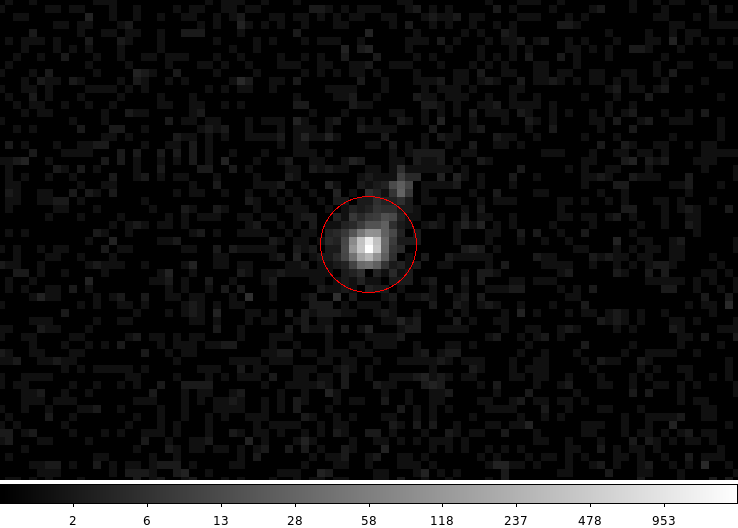

In [8]:
ds9 17128/primary/acisf17128N004_evt2.fits.gz \
 -bin about $x $y \
 -scale log \
 -region format ds9 \
 -region command "physical; circle($x,$y,6) # color=red" \
 -zoom 8 \
 -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

## Run fix script


In [9]:
pset correct_periscope_drift x=$x y=$y radius=6

pset correct_periscope_drift infile= 17128/primary/pcadf17128_002N001_asol1.fits.gz
pset correct_periscope_drift evtfile= 17128/primary/acisf17128N004_evt2.fits.gz
pset correct_periscope_drift outfile=driftcorr_asol1.fits
pset correct_periscope_drift corr_plot_root=demo_corr

correct_periscope_drift mode=h clob+

Running: correct_periscope_drift
  version = 6 Feb 2020
with parameters:
  infile=17128/primary/pcadf17128_002N001_asol1.fits.gz
  evtfile=17128/primary/acisf17128N004_evt2.fits.gz
  outfile=driftcorr_asol1.fits
  verbose=2
  and ASCDS_INSTALL is /export/CIAOT/ciaot_install/20211019/ciao-4.14
------------------------------------------------------------
Fitting a line to the data to get reduced stat errors
Fitting a polynomial of degree 2 to the data
Fitting a line to the data to get reduced stat errors
Fitting a polynomial of degree 2 to the data
------------------------------------------------------------
Fit results
	Events show drift range of 0.40 arcsec in yag axis
	Max absolute correction of 0.23 arcsec for yag axis
	Events show drift range of 0.05 arcsec in zag axis
	Max absolute correction of 0.03 arcsec for zag axis
------------------------------------------------------------
Writing out corrected aspect solution file to driftcorr_asol1.fits

You *must* review the following plo

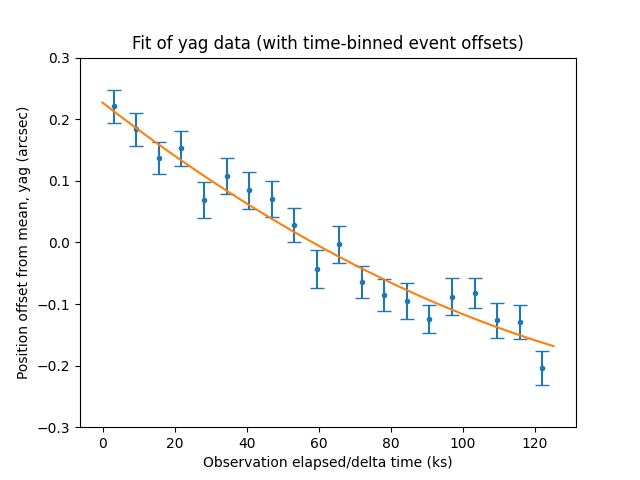

In [10]:
display < demo_corr_fit_yag.png

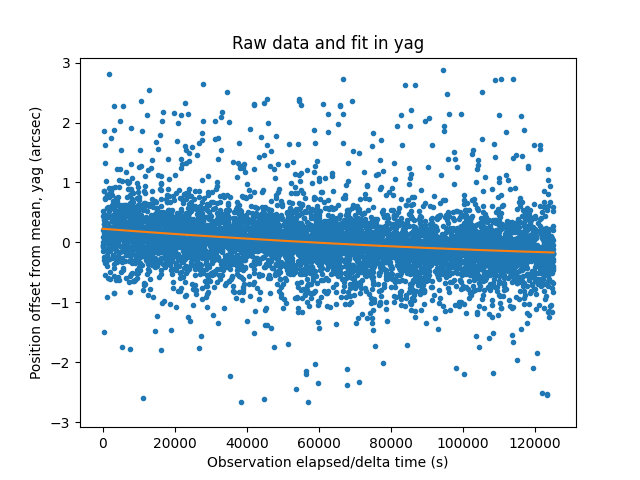

In [11]:
display < demo_corr_data_yag.png

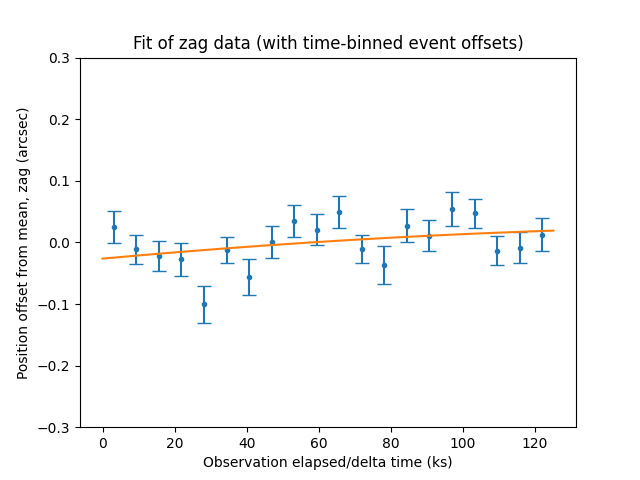

In [12]:
display < demo_corr_fit_zag.png

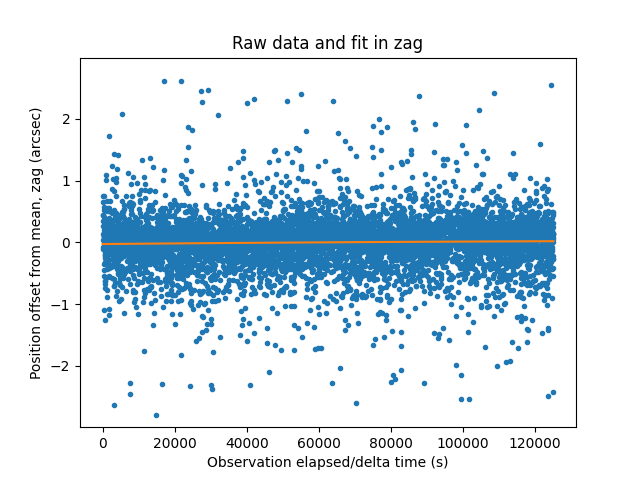

In [13]:
display < demo_corr_data_zag.png

## Apply correction : cuckoo-bird egg

In [14]:
mv -fv 17128/primary/pcadf17128_002N001_asol1.fits.gz 17128/pcadf17128_002N001_asol1.fits.gz.ORIG
cp -fv driftcorr_asol1.fits 17128/primary/pcadf557756838_driftcorr_asol1.fits

'17128/primary/pcadf17128_002N001_asol1.fits.gz' -> '17128/pcadf17128_002N001_asol1.fits.gz.ORIG'
'driftcorr_asol1.fits' -> '17128/primary/pcadf557756838_driftcorr_asol1.fits'


In [15]:
chandra_repro indir=17128 check_vf_pha=yes outdir= clob+


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/periscope_drift/17128'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.14): The following error occurred 31 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/periscope_drift/17128/repro/acisf17128_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-

## Repeat correction

In [17]:
pset correct_periscope_drift evtfile=17128/repro/acisf17128_repro_evt2.fits
pset correct_periscope_drift infile=17128/primary/pcadf557756838_driftcorr_asol1.fits
pset correct_periscope_drift outfile=already_fixed.fits
pset correct_periscope_drift corr_plot_root="already_fixed" clob+

correct_periscope_drift mode=h


Running: correct_periscope_drift
  version = 6 Feb 2020
with parameters:
  infile=17128/primary/pcadf557756838_driftcorr_asol1.fits
  evtfile=17128/repro/acisf17128_repro_evt2.fits
  outfile=already_fixed.fits
  verbose=2
  and ASCDS_INSTALL is /export/CIAOT/ciaot_install/20211019/ciao-4.14
------------------------------------------------------------
Fitting a line to the data to get reduced stat errors
Fitting a polynomial of degree 2 to the data
Fitting a line to the data to get reduced stat errors
Fitting a polynomial of degree 2 to the data
------------------------------------------------------------
Fit results
	Events show drift range of 0.01 arcsec in yag axis
	Max absolute correction of 0.01 arcsec for yag axis
	Events show drift range of 0.01 arcsec in zag axis
	Max absolute correction of 0.00 arcsec for zag axis
------------------------------------------------------------
Writing out corrected aspect solution file to already_fixed.fits

You *must* review the following plots b

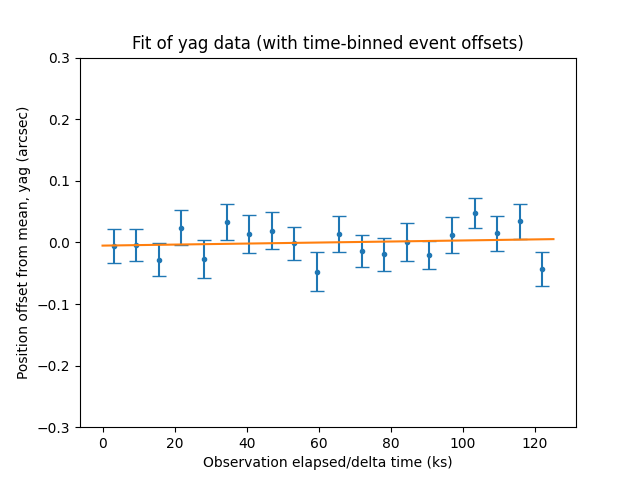

In [18]:
display < already_fixed_fit_yag.png

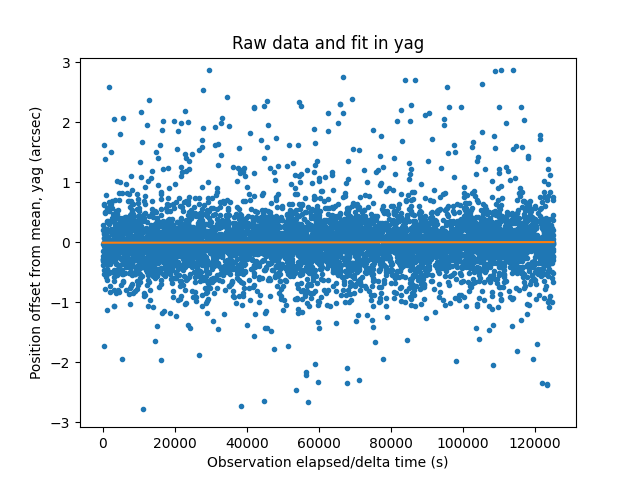

In [19]:
display < already_fixed_data_yag.png

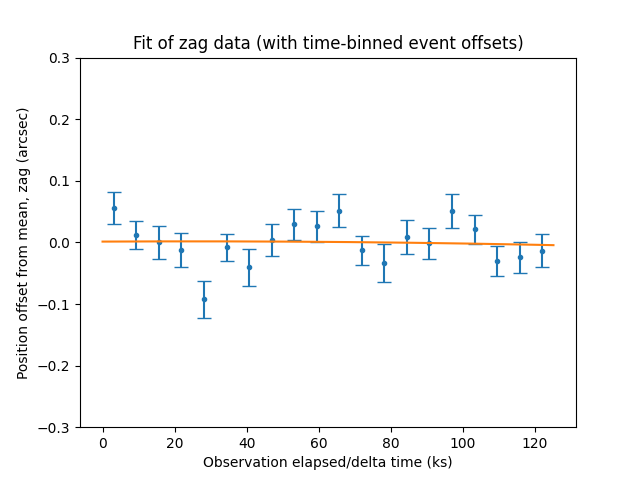

In [20]:
display < already_fixed_fit_zag.png

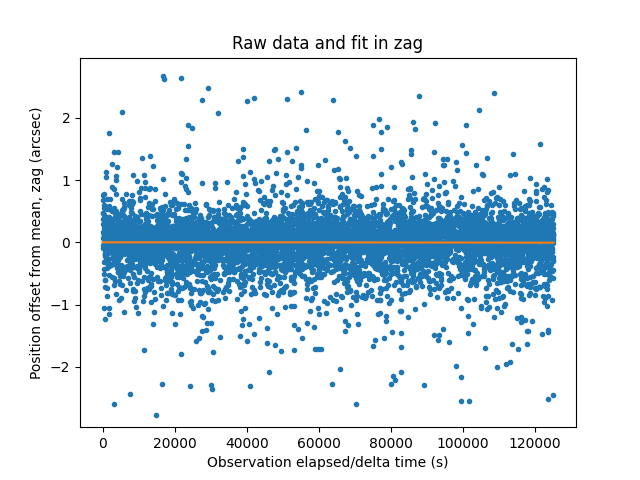

In [21]:
display < already_fixed_data_zag.png

[1] 47698
[1]+  Done                    ds9 17128/primary/acisf17128N004_evt2.fits.gz -scale log -zoom 8 -pan to $x $y physical 17128/repro/acisf17128_repro_evt2.fits -scale log -pan to $x $y physical -saveimage png ds9_02.png


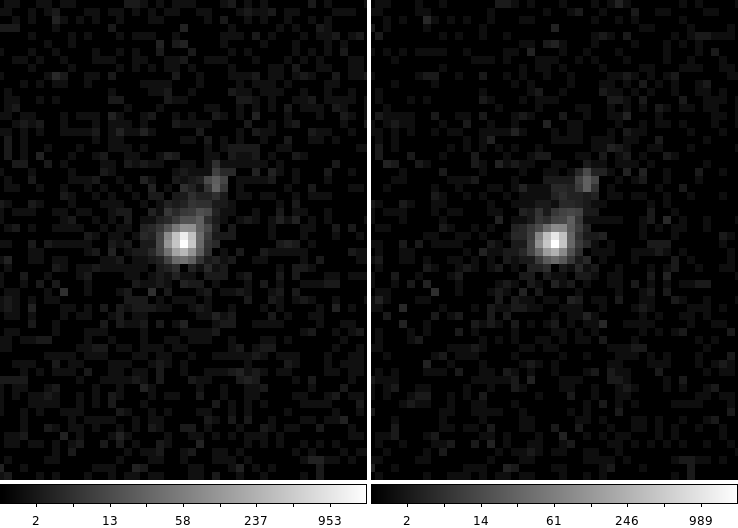

In [22]:
ds9 17128/primary/acisf17128N004_evt2.fits.gz  -scale log -zoom 8 -pan to $x $y physical \
    17128/repro/acisf17128_repro_evt2.fits -scale log -pan to $x $y physical \
    -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

In [23]:
dmstat 17128/primary/acisf17128N004_evt2.fits.gz"[sky=circle(${x},${y},6)][energy=500:7000][cols sky]" cen+ sig+ med-
dmstat 17128/repro/acisf17128_repro_evt2.fits"[sky=circle(${x},${y},6)][energy=500:7000][cols sky]" cen+ sig+ med-


sky(x, y)[pixel]
    min:	( 4102.3017578 4094.8027344 )	      @:	( 715 2511 )
    max:	( 4113.5195312 4106.2529297 )	      @:	( 1057 4472 )
   mean:	( 4107.9875469 4100.3755976 )
  sigma:	( 0.92158994558 0.97134676342 )
    sum:	( 24512361.692 24466941.191 )
   good:	( 5967 5967 )
   null:	( 0 0 )

sky(x, y)[pixel]
    min:	( 4102.2583008 4094.7702637 )	      @:	( 685 2420 )
    max:	( 4113.855957 4106.269043 )	      @:	( 786 5225 )
   mean:	( 4107.985733 4100.3758745 )
  sigma:	( 0.91586244307 0.93162698004 )
    sum:	( 23588054.079 23544358.271 )
   good:	( 5742 5742 )
   null:	( 0 0 )



In [24]:
dmstat 17128/primary/acisf17128N004_evt2.fits.gz"[sky=circle(${x},${y},6)][energy=500:7000][bin sky=0.1]" cen+ sig+ med-
dmstat 17128/repro/acisf17128_repro_evt2.fits"[sky=circle(${x},${y},6)][energy=500:7000][bin sky=0.1]" cen+ sig+ med-


EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 4107.2315646 4094.4377845 )
    max:	40 	      @:	( 4108.1315646 4100.5377845 )
cntrd[log] :	( 60.562594268 60.380258086 )
cntrd[phys]:	( 4107.987824 4100.3758104 )
sigma_cntrd:	( 44.129105351 44.055860744 )
   good:	11304 
   null:	3096 
EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 4107.2315646 4094.4377845 )
    max:	49 	      @:	( 4108.2315646 4100.3377845 )
cntrd[log] :	( 60.543538837 60.382793452 )
cntrd[phys]:	( 4107.9859185 4100.3760639 )
sigma_cntrd:	( 43.283030472 43.188303148 )
   good:	11304 
   null:	3096 


In [25]:
imgmoment 17128/primary/acisf17128N004_evt2.fits.gz"[sky=circle(${x},${y},6)][energy=500:7000][bin sky=0.1]"
pdump imgmoment

infile='17128/primary/acisf17128N004_evt2.fits.gz[sky=circle(4107.98156460404,4100.38778454633,6)][energy=500:7000][bin sky=0.1]'
x_mu='4107.987824030874'
y_mu='4100.375810354957'
m_0_0='5967'
m_0_1='-7.640983312739991e-08'
m_1_0='7.715789251960814e-08'
m_1_1='721.9647360482771'
m_0_2='5645.101944025557'
m_2_0='5070.863710407338'
m_1_2='1692.918804944862'
m_2_1='1011.934496051741'
m_2_2='14878.6331073245'
phi='55.84363634232962'
eccen='0'
xsig='2.027950355624415'
ysig='1.75239939300498'
mode='ql'
# EOF


In [26]:
imgmoment 17128/repro/acisf17128_repro_evt2.fits"[sky=circle(${x},${y},6)][energy=500:7000][bin sky=0.1]"
pdump imgmoment

infile='17128/repro/acisf17128_repro_evt2.fits[sky=circle(4107.98156460404,4100.38778454633,6)][energy=500:7000][bin sky=0.1]'
x_mu='4107.985918487685'
y_mu='4100.376063891521'
m_0_0='5742'
m_0_1='-8.488405001116917e-08'
m_1_0='1.086500560631976e-07'
m_1_1='641.4030163705925'
m_0_2='4995.106199930391'
m_2_0='4814.266152908436'
m_1_2='1540.089281162865'
m_2_1='1060.313189291658'
m_2_2='13695.67864483292'
phi='49.01211037788348'
eccen='0'
xsig='1.966708498172784'
ysig='1.722055820858454'
mode='ql'
# EOF
